In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
df = pd.read_csv('WorldBank_remittance_prices_2011_2015.csv')

In [180]:
df.head()

,id,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,...,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,note1,note2,coverage,pick-up method,date
0,13123,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.770000,3.29,5.29,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
1,13129,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.767737,3.42,5.82,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
2,13128,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.750000,4.38,7.38,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
3,13127,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.791400,2.12,6.12,1.83024,yes,NaN,NaN,Nationwide,Bank Account,24/Jan/2011
4,13135,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.764200,3.61,7.61,1.83024,yes,NaN,NaN,Nationwide,Bank Account,24/Jan/2011


In [181]:
df.describe()

,id,cc1 lcu amount,cc1 denomination amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,cc2 lcu amount,cc2 denomination amount,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx
count,39853.000000,39750.000000,39773.000000,39847.000000,39853.000000,39852.000000,39853.000000,39852.000000,39775.000000,39730.000000,39644.000000,39752.000000,39751.000000,39853.000000
mean,26790.166386,9394.382156,200.000025,1063.705353,373.959745,1.785430,8.652767,23318.896762,500.000075,1194.615528,370.632236,1.785907,5.147292,382.819580
std,14876.331816,46041.976589,0.005014,7867.826622,2104.899846,2.344927,6.588614,114557.836297,0.008684,8182.159794,2087.539747,2.344367,3.579412,2158.719017
min,1.000000,120.000000,200.000000,0.000000,0.000300,-16.580000,-8.970000,0.000000,500.000000,0.000000,0.000300,-16.580000,-13.420000,0.000310
25%,14084.000000,NaN,NaN,NaN,1.000000,NaN,4.250000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,29813.000000,NaN,NaN,NaN,2.740000,NaN,6.910000,NaN,NaN,NaN,NaN,NaN,NaN,2.826500
75%,39796.000000,NaN,NaN,NaN,43.360000,NaN,11.180000,NaN,NaN,NaN,NaN,NaN,NaN,44.330000
max,49754.000000,324500.000000,201.000000,146025.000000,28662.686000,36.050000,75.000000,811000.000000,501.000000,145980.000000,28662.686000,36.050000,42.650000,29667.100000


In [182]:
df.dtypes

id                           int64
period                      object
source_code                 object
source_name                 object
source_region               object
source_income               object
source_lending              object
source_G8G20                object
destination_code            object
destination_name            object
destination_region          object
destination_income          object
destination_lending         object
destination_G8G20           object
firm                        object
firm_type                   object
product                     object
sending location            object
speed actual                object
cc1 lcu amount             float64
cc1 denomination amount    float64
cc1 lcu code                object
cc1 lcu fee                float64
cc1 lcu fx rate            float64
cc1 fx margin              float64
cc1 total cost %           float64
cc2 lcu amount             float64
cc2 denomination amount    float64
cc2 lcu code        

In [183]:
df['source_income'].unique()

array(['High income: OECD', 'Upper middle income', 'Lower middle income',
       'High income: nonOECD', 'Low income'], dtype=object)

In [184]:
df['destination_income'].unique()

array(['Upper middle income', 'Lower middle income', 'Low income',
       'High income: nonOECD', 'High income: OECD'], dtype=object)

In [185]:
df['pick-up method'].unique()

array(['Cash', 'Bank Account', 'Own/partner Bank Account', 'Home Delivery',
       'ATM Network', 'Mobile', 'ATM, Bank Account', nan,
       'Bank Account, Home Delivery', 'Cash, Bank Account',
       'Cash, Home Delivery', 'Cash, Bank Account, Home Delivery',
       'own/partner Bank Account', 'Home delivery', 'Prepaid cash card',
       'Credit Card', 'Mobile, Cash', 'Mobile, Bank Account',
       'Door to Door, Bank Account',
       'Own/partner bank account in receiving country', 'Bank account',
       'Own/Partner bank account', 'Cash, Bank account',
       'Door to door, Bank account', 'ATM, Bank account',
       'Cash, Bank account, Home delivery', 'Bank account, Home delivery',
       'ATM Network, Bank Acciunt', 'Cash, Bank Account, Mobile',
       'Cash, Mobile'], dtype=object)

In [186]:
df['cc1 total cost %'].nunique()

2841

In [187]:
df['total cost'] = df['cc1 total cost %'] + df['cc2 total cost %']
df['total cost'] = df['total cost'] /2

In [188]:
df['total cost'].describe()

count    39751.000000
mean         6.905505
std          4.945691
min        -11.195000
25%               NaN
50%               NaN
75%               NaN
max         52.500000
Name: total cost, dtype: float64

In [189]:
df = df[np.isfinite(df['total cost'])]

In [190]:
len(df)

39751

In [191]:
df[df['total cost'] < 0]

,id,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,...,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,note1,note2,coverage,pick-up method,date,total cost
371,13638,2011_1Q,DOM,Dominican Republic,Latin America & Caribbean,Upper middle income,IBRD,..,HTI,Haiti,...,-0.52,-0.52,37.45620,yes,A negative exchange rate margin for this opera...,NaN,Nationwide,Cash,27/Jan/2011,-0.520
973,14465,2011_1Q,MYS,Malaysia,East Asia & Pacific,Upper middle income,IBRD,..,BGD,Bangladesh,...,-1.16,-0.51,23.26000,yes,A negative exchange rate margin for this opera...,NaN,Nationwide,NaN,27/Jan/2011,-0.015
1087,14580,2011_1Q,NZL,New Zealand,..,High income: OECD,..,..,KIR,Kiribati,...,-0.43,-0.40,0.76528,yes,NaN,NaN,Urban only,NaN,25/Jan/2011,-0.395
1162,14635,2011_1Q,NZL,New Zealand,..,High income: OECD,..,..,TUV,Tuvalu,...,-0.43,-0.40,0.76528,yes,NaN,NaN,Nationwide,NaN,25/Jan/2011,-0.395
1438,14944,2011_1Q,SGP,Singapore,..,High income: nonOECD,..,..,PHL,Philippines,...,-1.36,-0.59,33.79000,yes,A negative exchange rate margin for this opera...,NaN,Nationwide,NaN,26/Jan/2011,-0.015
1905,13952,2011_1Q,GBR,United Kingdom,..,High income: OECD,..,G8/G20,GMB,"Gambia, The",...,-5.50,-2.50,42.18169,yes,This RSP's negative cost may be due to it havi...,NaN,Main city,Cash,25/Jan/2011,-2.500
1906,13945,2011_1Q,GBR,United Kingdom,..,High income: OECD,..,G8/G20,GMB,"Gambia, The",...,-5.73,-3.07,42.18169,yes,This RSP's negative cost may be due to it havi...,NaN,Major cities,Cash,25/Jan/2011,-2.320
2031,14090,2011_1Q,GBR,United Kingdom,..,High income: OECD,..,G8/G20,PHL,Philippines,...,-0.73,-0.73,70.23480,yes,This RSP's negative cost may be due to it havi...,NaN,Nationwide,Mobile,25/Jan/2011,-0.730
2135,14003,2011_1Q,GBR,United Kingdom,..,High income: OECD,..,G8/G20,LKA,Sri Lanka,...,-4.27,-3.27,175.02700,yes,This RSP's negative cost may be due to it havi...,NaN,Nationwide,Bank Account,25/Jan/2011,-2.520
3301,27408,2011_3Q,DEU,Germany,..,High income: OECD,..,G8/G20,TUR,Turkey,...,-9.05,-4.71,2.48500,yes,A negative exchange rate margin for this opera...,NaN,Nationwide,Bank Account,08/Sep/2011,-1.525


In [110]:
df['from_to'] = df['source_income'] + '-' + df['destination_income']

In [111]:
df['from_to'].nunique()

16

In [192]:
df.columns

Index([u'id', u'period', u'source_code', u'source_name', u'source_region',
       u'source_income', u'source_lending', u'source_G8G20',
       u'destination_code', u'destination_name', u'destination_region',
       u'destination_income', u'destination_lending', u'destination_G8G20',
       u'firm', u'firm_type', u'product', u'sending location', u'speed actual',
       u'cc1 lcu amount', u'cc1 denomination amount', u'cc1 lcu code',
       u'cc1 lcu fee', u'cc1 lcu fx rate', u'cc1 fx margin',
       u'cc1 total cost %', u'cc2 lcu amount', u'cc2 denomination amount',
       u'cc2 lcu code', u'cc2 lcu fee', u'cc2 lcu fx rate', u'cc2 fx margin',
       u'cc2 total cost %', u'inter lcu bank fx', u'transparent', u'note1',
       u'note2', u'coverage', u'pick-up method', u'date', u'total cost'],
      dtype='object')

In [193]:
df['source_income'].unique()

array(['High income: OECD', 'Upper middle income', 'Lower middle income',
       'High income: nonOECD', 'Low income'], dtype=object)

In [194]:
del df['id']
del df['period']
del df['source_code']
del df['source_name']
del df['destination_code']
del df['destination_name']
del df['firm']
del df['firm_type']
del df['product']
del df['speed actual']
del df['cc1 lcu amount']
del df['cc1 denomination amount']
del df['cc1 lcu code']
del df['cc1 lcu fee']
del df['cc1 lcu fx rate']
del df['cc1 fx margin']
del df['cc1 total cost %']
del df['cc2 lcu amount']
del df['cc2 denomination amount']
del df['cc2 lcu code']
del df['cc2 lcu fee']
del df['cc2 lcu fx rate']
del df['cc2 fx margin']
del df['cc2 total cost %']
del df['inter lcu bank fx']
del df['note1']
del df['note2']
del df['pick-up method']

In [195]:
df.head()

,source_region,source_income,source_lending,source_G8G20,destination_region,destination_income,destination_lending,destination_G8G20,sending location,transparent,coverage,date,total cost
0,..,High income: OECD,..,G20,East Asia & Pacific,Upper middle income,IBRD,..,Not available,yes,Nationwide,24/Jan/2011,7.04
1,..,High income: OECD,..,G20,East Asia & Pacific,Upper middle income,IBRD,..,Not available,yes,Nationwide,24/Jan/2011,7.62
2,..,High income: OECD,..,G20,East Asia & Pacific,Upper middle income,IBRD,..,Not available,yes,Nationwide,24/Jan/2011,9.63
3,..,High income: OECD,..,G20,East Asia & Pacific,Upper middle income,IBRD,..,Not available,yes,Nationwide,24/Jan/2011,9.12
4,..,High income: OECD,..,G20,East Asia & Pacific,Upper middle income,IBRD,..,Not available,yes,Nationwide,24/Jan/2011,10.61


In [196]:
df = df.replace('..', np.NaN)

In [197]:
df.head()

,source_region,source_income,source_lending,source_G8G20,destination_region,destination_income,destination_lending,destination_G8G20,sending location,transparent,coverage,date,total cost
0,NaN,High income: OECD,NaN,G20,East Asia & Pacific,Upper middle income,IBRD,NaN,Not available,yes,Nationwide,24/Jan/2011,7.04
1,NaN,High income: OECD,NaN,G20,East Asia & Pacific,Upper middle income,IBRD,NaN,Not available,yes,Nationwide,24/Jan/2011,7.62
2,NaN,High income: OECD,NaN,G20,East Asia & Pacific,Upper middle income,IBRD,NaN,Not available,yes,Nationwide,24/Jan/2011,9.63
3,NaN,High income: OECD,NaN,G20,East Asia & Pacific,Upper middle income,IBRD,NaN,Not available,yes,Nationwide,24/Jan/2011,9.12
4,NaN,High income: OECD,NaN,G20,East Asia & Pacific,Upper middle income,IBRD,NaN,Not available,yes,Nationwide,24/Jan/2011,10.61


In [198]:
df['destination_lending'].unique()

array(['IBRD', 'IDA', 'Blend', nan], dtype=object)

In [199]:
del df['sending location']

In [200]:
df['destination_G8G20'] = df['destination_G8G20'].replace(np.NaN, 0)
df['destination_G8G20'] = df['destination_G8G20'].replace('G20', 1)

In [201]:
df['source_G8G20'] = df['source_G8G20'].replace(np.NaN, 0)
df['source_G8G20'] = df['source_G8G20'].replace('G20', 1)

In [202]:
df['transparent'] = df['transparent'].replace('yes', 1)
df['transparent'] = df['transparent'].replace('no', 0)

In [203]:
df2 = df.dropna()

In [204]:
len(df2)

3102

In [205]:
len(df)

39751

In [227]:
for c in df.columns:
    print c, len(df[c]) - df[c].count()

source_income 0
source_G8G20 0
destination_income 0
destination_lending 0
destination_G8G20 0
transparent 0
coverage 0
date 0
avg_cost 0


In [207]:
df['destination_region'].describe()

count                   38452
unique                      6
top       East Asia & Pacific
freq                    11321
Name: destination_region, dtype: object

In [208]:
del df['source_region']
del df['destination_region']
del df['source_lending']

In [210]:
df = df.dropna()

In [211]:
len(df)

39182

In [212]:
df.head()

,source_income,source_G8G20,destination_income,destination_lending,destination_G8G20,transparent,coverage,date,total cost
0,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,24/Jan/2011,7.04
1,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,24/Jan/2011,7.62
2,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,24/Jan/2011,9.63
3,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,24/Jan/2011,9.12
4,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,24/Jan/2011,10.61


In [213]:
df['date'] = pd.to_datetime(df['date'])

In [214]:
df.dtypes

source_income                  object
source_G8G20                   object
destination_income             object
destination_lending            object
destination_G8G20               int64
transparent                     int64
coverage                       object
date                   datetime64[ns]
total cost                    float64
dtype: object

In [215]:
df['source_income'].unique()

array(['High income: OECD', 'Upper middle income', 'Lower middle income',
       'High income: nonOECD', 'Low income'], dtype=object)

In [217]:
df.head()

,source_income,source_G8G20,destination_income,destination_lending,destination_G8G20,transparent,coverage,date,total cost
0,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,7.04
1,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,7.62
2,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,9.63
3,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,9.12
4,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,10.61


In [218]:
df['coverage'].unique()

array(['Nationwide', 'Major cities', 'Main city', 'Rural only',
       'Urban only'], dtype=object)

In [219]:
df['avg_cost'] = df['total cost']

In [220]:
del df['total cost']

In [221]:
df.head()

,source_income,source_G8G20,destination_income,destination_lending,destination_G8G20,transparent,coverage,date,avg_cost
0,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,7.04
1,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,7.62
2,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,9.63
3,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,9.12
4,High income: OECD,1,Upper middle income,IBRD,0,1,Nationwide,2011-01-24,10.61


In [156]:
plt.rcParams['figure.figsize']=(20,10)

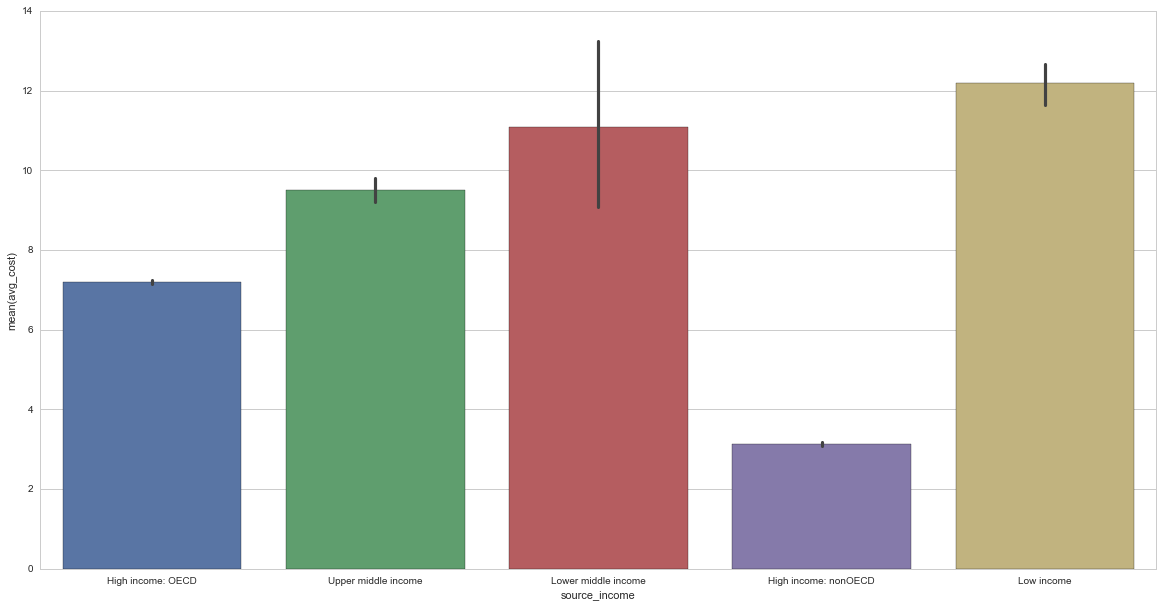

In [157]:
sns.set_style("whitegrid")
ax = sns.barplot(x="source_income", y="avg_cost", data=df)

In [175]:
df['source_income'].unique()

array(['High income: OECD', 'Upper middle income', 'Lower middle income',
       'High income: nonOECD', 'Low income'], dtype=object)

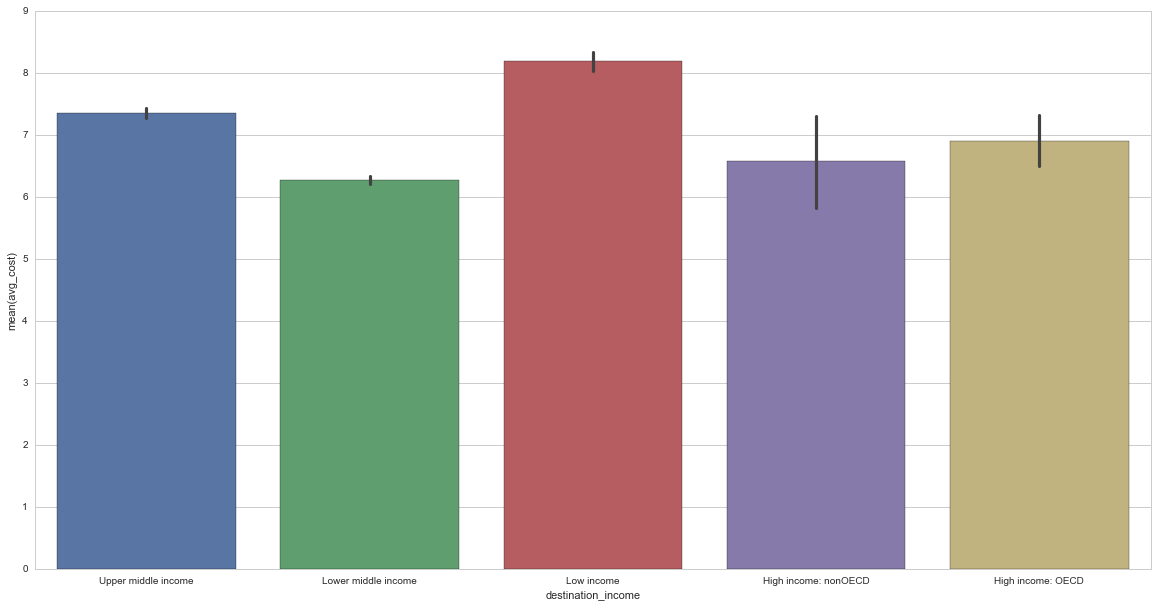

In [158]:
ax = sns.barplot(x="destination_income", y="avg_cost", data=df)

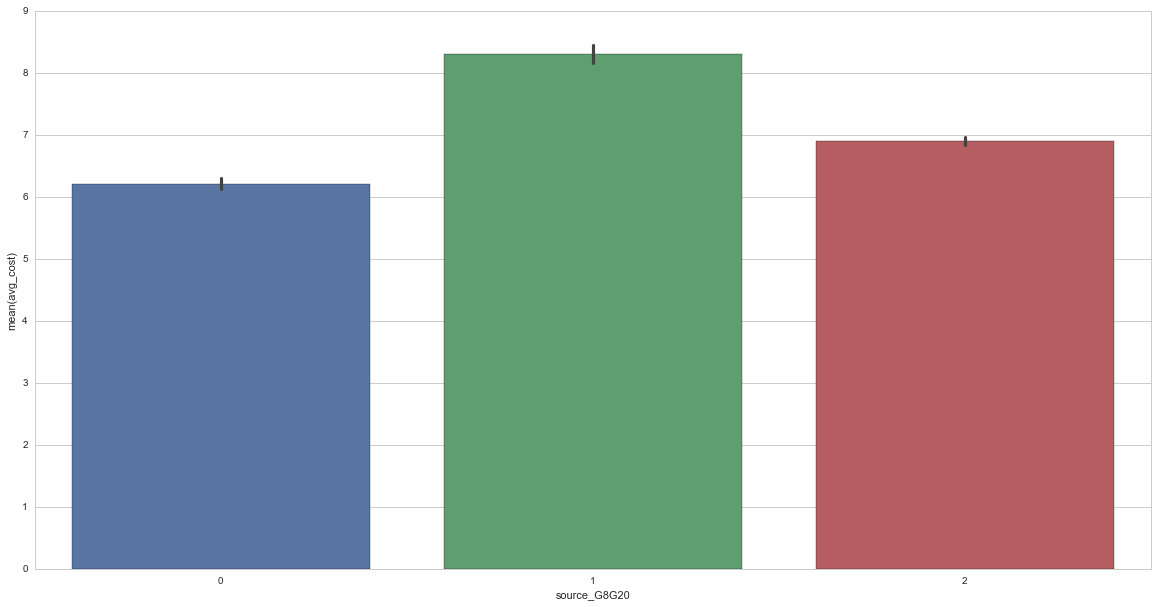

In [161]:
ax = sns.barplot(x="source_G8G20", y="avg_cost", data=df)

In [222]:
df['source_G8G20'] = df['source_G8G20'].replace('G8/G20', 2)

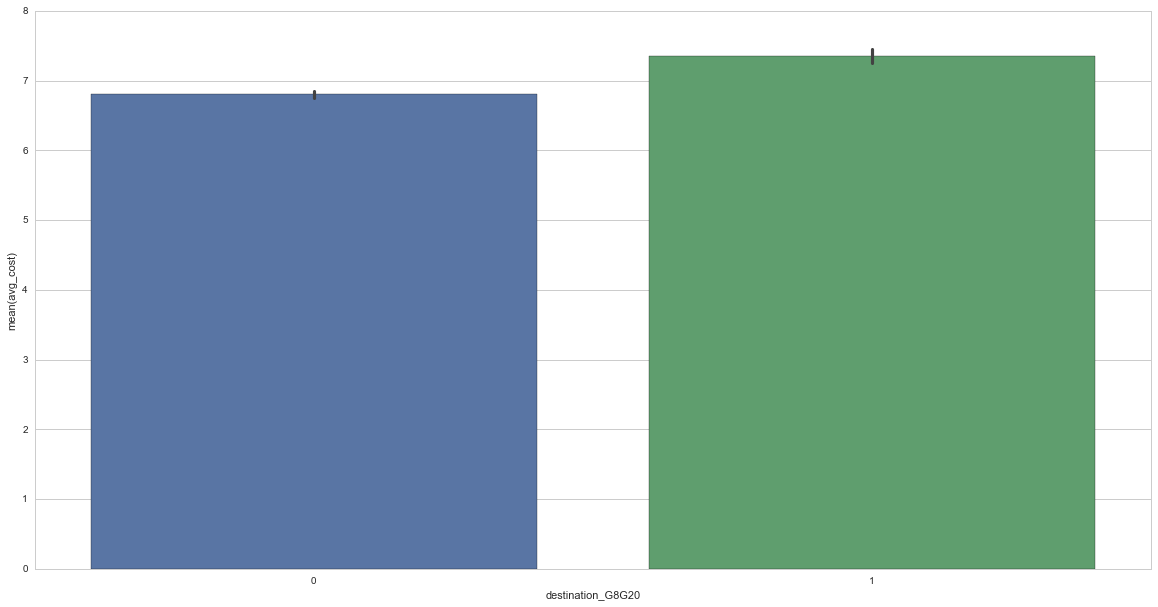

In [162]:
ax = sns.barplot(x="destination_G8G20", y="avg_cost", data=df)

In [178]:
df['destination_lending'].unique()

array(['IBRD', 'IDA', 'Blend'], dtype=object)

In [235]:
df_dl = pd.get_dummies(df['destination_lending'], prefix='destination_lending')
df = df.join(df_dl.ix[:, :"destination_lending_IBRD"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39182 entries, 0 to 39852
Data columns (total 11 columns):
source_income                39182 non-null object
source_G8G20                 39182 non-null int64
destination_income           39182 non-null object
destination_lending          39182 non-null object
destination_G8G20            39182 non-null int64
transparent                  39182 non-null int64
coverage                     39182 non-null object
date                         39182 non-null datetime64[ns]
avg_cost                     39182 non-null float64
destination_lending_Blend    39182 non-null float64
destination_lending_IBRD     39182 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 3.6+ MB


In [242]:
df_c = pd.get_dummies(df['coverage'], prefix='coverage')
df = df.join(df_c.ix[:, :"coverage_Rural only"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39182 entries, 0 to 39852
Data columns (total 15 columns):
source_income                39182 non-null object
source_G8G20                 39182 non-null int64
destination_income           39182 non-null object
destination_lending          39182 non-null object
destination_G8G20            39182 non-null int64
transparent                  39182 non-null int64
coverage                     39182 non-null object
date                         39182 non-null datetime64[ns]
avg_cost                     39182 non-null float64
destination_lending_Blend    39182 non-null float64
destination_lending_IBRD     39182 non-null float64
coverage_Main city           39182 non-null float64
coverage_Major cities        39182 non-null float64
coverage_Nationwide          39182 non-null float64
coverage_Rural only          39182 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(4)
memory usage: 4.8+ MB


In [246]:
df_dg = pd.get_dummies(df['source_G8G20'], prefix='source_G8G20')
df = df.join(df_dg.ix[:, :"source_G8G20_1"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39182 entries, 0 to 39852
Data columns (total 17 columns):
source_income                39182 non-null object
source_G8G20                 39182 non-null int64
destination_income           39182 non-null object
destination_lending          39182 non-null object
destination_G8G20            39182 non-null int64
transparent                  39182 non-null int64
coverage                     39182 non-null object
date                         39182 non-null datetime64[ns]
avg_cost                     39182 non-null float64
destination_lending_Blend    39182 non-null float64
destination_lending_IBRD     39182 non-null float64
coverage_Main city           39182 non-null float64
coverage_Major cities        39182 non-null float64
coverage_Nationwide          39182 non-null float64
coverage_Rural only          39182 non-null float64
source_G8G20_0               39182 non-null float64
source_G8G20_1               39182 non-null float64
dtypes: da

In [257]:
df_dg = pd.get_dummies(df['source_income'], prefix='source_income')
df = df.join(df_dg.ix[:, df_dg.columns != 'source_income_Low income'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39182 entries, 0 to 39852
Data columns (total 21 columns):
source_income                         39182 non-null object
source_G8G20                          39182 non-null int64
destination_income                    39182 non-null object
destination_lending                   39182 non-null object
destination_G8G20                     39182 non-null int64
transparent                           39182 non-null int64
coverage                              39182 non-null object
date                                  39182 non-null datetime64[ns]
avg_cost                              39182 non-null float64
destination_lending_Blend             39182 non-null float64
destination_lending_IBRD              39182 non-null float64
coverage_Main city                    39182 non-null float64
coverage_Major cities                 39182 non-null float64
coverage_Nationwide                   39182 non-null float64
coverage_Rural only                   39

In [258]:
df_dg = pd.get_dummies(df['destination_income'], prefix='destination_income')
df = df.join(df_dg.ix[:, df_dg.columns != 'destination_income_Low income'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39182 entries, 0 to 39852
Data columns (total 25 columns):
source_income                              39182 non-null object
source_G8G20                               39182 non-null int64
destination_income                         39182 non-null object
destination_lending                        39182 non-null object
destination_G8G20                          39182 non-null int64
transparent                                39182 non-null int64
coverage                                   39182 non-null object
date                                       39182 non-null datetime64[ns]
avg_cost                                   39182 non-null float64
destination_lending_Blend                  39182 non-null float64
destination_lending_IBRD                   39182 non-null float64
coverage_Main city                         39182 non-null float64
coverage_Major cities                      39182 non-null float64
coverage_Nationwide                 

In [259]:
del df['destination_income']
del df['source_income']
del df['source_G8G20']
del df['coverage']
del df['destination_lending']

In [267]:
df['year'] = df['date'].dt.year

In [271]:
df_dg = pd.get_dummies(df['year'], prefix='year')
df = df.join(df_dg.ix[:, df_dg.columns != 'year_2011'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39182 entries, 0 to 39852
Data columns (total 25 columns):
destination_G8G20                          39182 non-null int64
transparent                                39182 non-null int64
date                                       39182 non-null datetime64[ns]
avg_cost                                   39182 non-null float64
destination_lending_Blend                  39182 non-null float64
destination_lending_IBRD                   39182 non-null float64
coverage_Main city                         39182 non-null float64
coverage_Major cities                      39182 non-null float64
coverage_Nationwide                        39182 non-null float64
coverage_Rural only                        39182 non-null float64
source_G8G20_0                             39182 non-null float64
source_G8G20_1                             39182 non-null float64
source_income_High income: OECD            39182 non-null float64
source_income_High income: non

In [272]:
del df['date']

In [280]:
del df['year']

In [281]:
X = df.ix[:, df.columns != 'avg_cost']
y = df['avg_cost']

In [290]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [294]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [284]:
print(X_train.shape)
print(X_test.shape)
print('Training/Test Ratio: {}'.format(X_train.shape[0] / X_test.shape[0]))

(31345, 22)
(7837, 22)
Training/Test Ratio: 3


In [295]:
print(y_train.shape)
print(y_test.shape)
print('Training/Test Ratio: {}'.format(y_train.shape[0] / y_test.shape[0]))

(31345,)
(7837,)
Training/Test Ratio: 3


In [285]:
parameters = {
              'n_estimators': 500, 
              'max_depth': 4, 
              'min_samples_split': 1,
              'learning_rate': 0.01, 
              'loss': 'ls'
             }

In [299]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('score: %.2f' % regr.score(X_test, y_test))


('Coefficients: \n', array([ 0.97680391, -2.04125523, -0.83716101, -1.64425115, -0.10445586,
       -0.70433886,  1.60058821,  0.40732289, -0.23257979,  1.47565509,
       -4.78886616, -8.2933297 , -1.35436115, -3.0611732 ,  0.67499457,
        0.56812227, -0.36351366,  0.74801147,  0.07896534, -0.11446845,
       -0.6427266 , -0.98096804]))
Mean squared error: 20.87
score: 0.18


In [300]:
regressor = DecisionTreeRegressor(random_state=0)

# Train the model using the training sets
regressor.fit(X_train, y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('score: %.2f' % regressor.score(X_test, y_test))

# model_selection.cross_val_score(regressor, X, y, cv=10)

Mean squared error: 18.57
score: 0.27


In [301]:
from sklearn.svm import SVR
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train) 

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('score: %.2f' % clf.score(X_test, y_test))


Mean squared error: 21.04
score: 0.17


In [302]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((neigh.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('score: %.2f' % neigh.score(X_test, y_test))

Mean squared error: 29.48
score: -0.16


In [304]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor()
clf.fit(X_train, y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('score: %.2f' % clf.score(X_test, y_test))


Mean squared error: 18.51
score: 0.27


In [314]:
from sklearn.linear_model import Lasso
clf = Lasso()
clf.fit(X_train, y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('score: %.2f' % clf.score(X_test, y_test))


Mean squared error: 25.37
score: -0.00


In [317]:
from sklearn.svm import SVR
clf = SVR(kernel='poly', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train) 

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('score: %.2f' % clf.score(X_test, y_test))


Mean squared error: 22.82
score: 0.10


In [329]:
bins = [0, 5, 10, 15, 20, 55]
group_names = ['low', 'midlow', 'mid', 'midhigh', 'high']

categories = pd.cut(df['avg_cost'], bins, labels=group_names)
df['avg_cost'] = pd.cut(df['avg_cost'], bins, labels=group_names)

In [330]:
categories.value_counts()

low        16524
midlow     14097
mid         5154
midhigh     2137
high         893
Name: avg_cost, dtype: int64

In [331]:
X = df.ix[:, df.columns != 'avg_cost']
y = df['avg_cost']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [337]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

# Explained variance score: 1 is perfect prediction
print('score: %.2f' % neigh.score(X_test, y_test))


score: 0.45


/Users/Amer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:177: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  score = y_true == y_pred


In [338]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 

# Explained variance score: 1 is perfect prediction
print('score: %.2f' % clf.score(X_test, y_test))

score: 0.51


In [339]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train) 

# Explained variance score: 1 is perfect prediction
print('score: %.2f' % clf.score(X_test, y_test))

score: 0.52


In [340]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier()
clf.fit(X_train, y_train) 

# Explained variance score: 1 is perfect prediction
print('score: %.2f' % clf.score(X_test, y_test))

score: 0.52


In [348]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, RandomForestRegressor

def cross_val(model, X, y):
    s = model_selection.cross_val_score(model, X, y)
    print("{} Score:\t{:0.3} ± {:0.3}".format(type(model), s.mean().round(3), s.std().round(3)))

In [355]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

# Estimate the scores without the missing values
X_filtered = X
y_filtered = y

dt = DecisionTreeClassifier()
cross_val(dt, X_filtered, y_filtered)
bagger = BaggingClassifier(dt, max_samples=1.0)
cross_val(bagger, X_filtered, y_filtered)
forest = RandomForestClassifier(n_jobs=-1, n_estimators=10)
cross_val(forest, X_filtered, y_filtered)
trees = ExtraTreesClassifier(n_jobs=-1)
cross_val(trees, X_filtered, y_filtered)
bag = BaggingClassifier()
cross_val(bag, X_filtered, y_filtered)


<class 'sklearn.tree.tree.DecisionTreeClassifier'> Score:	0.445 ± 0.073
<class 'sklearn.ensemble.bagging.BaggingClassifier'> Score:	0.438 ± 0.081
<class 'sklearn.ensemble.forest.RandomForestClassifier'> Score:	0.448 ± 0.075
<class 'sklearn.ensemble.forest.ExtraTreesClassifier'> Score:	0.442 ± 0.077
<class 'sklearn.ensemble.bagging.BaggingClassifier'> Score:	0.439 ± 0.084


In [360]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [361]:
gb = GradientBoostingClassifier()
ab = AdaBoostClassifier()
cross_val(gb, X_filtered, y_filtered)
cross_val(ab, X_filtered, y_filtered)


<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> Score:	0.416 ± 0.102


/Users/Amer/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:513: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  y_coding = y_codes.take(classes == y[:, np.newaxis])
/Users/Amer/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:493: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  incorrect = y_predict != y


<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> Score:	0.396 ± 0.096


In [362]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [363]:
pipedt = make_pipeline(RobustScaler(),
                       DecisionTreeClassifier())
cross_val(pipedt, X_filtered, y_filtered)

pipebdt = make_pipeline(RobustScaler(),
                        BaggingClassifier(DecisionTreeClassifier()))
cross_val(pipebdt, X_filtered, y_filtered)

<class 'sklearn.pipeline.Pipeline'> Score:	0.443 ± 0.071
<class 'sklearn.pipeline.Pipeline'> Score:	0.442 ± 0.079


In [364]:
from sklearn.grid_search import GridSearchCV

In [365]:
# Initialize a GridSearchCV with 5-fold cross validation for the Decision Tree Classifier
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7]
         }
    

gsdt = GridSearchCV(dt, params, n_jobs=-1, cv=5)

In [366]:
gsdt.fit(X_filtered, y_filtered)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [367]:
gsdt.best_score_

0.4992088203767036

In [368]:
# I initialized a GridSearchCV with 5-fold cross validation for the Bagging Decision Tree Classifier
# and repeated the search
params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
         }
    

gsbdt = GridSearchCV(bagger, params, n_jobs=-1, cv=5)

In [369]:
gsbdt.fit(X_filtered, y_filtered)

Process PoolWorker-3:
Traceback (most recent call last):
  File "/Users/Amer/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/Amer/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)


IOError: [Errno 22] Invalid argument

  File "/Users/Amer/anaconda/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
  File "/Users/Amer/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/pool.py", line 362, in get
    return recv()
KeyboardInterrupt


In [ ]:
gsbdt.best_score_

In [370]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cross_val(lr, X_filtered, y_filtered)

<class 'sklearn.linear_model.logistic.LogisticRegression'> Score:	0.412 ± 0.096
